In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# --- 1. Arsitektur CNN ---

# Input image shape (sesuai dataset PlantVillage)
input_shape = (128, 128, 3)
num_classes = 3  # 3 kelas: Early_blight, Healthy, Late_blight

model = models.Sequential([
    # Layer konvolusi pertama
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Filter 3x3, 32 feature maps
    layers.MaxPooling2D((2, 2)),  # Pooling max 2x2 untuk downsampling

    # Layer konvolusi kedua
    layers.Conv2D(64, (3, 3), activation='relu'),  # Filter 3x3, 64 feature maps
    layers.MaxPooling2D((2, 2)),

    # Layer konvolusi ketiga
    layers.Conv2D(128, (3, 3), activation='relu'),  # Filter 3x3, 128 feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten untuk fully connected layers
    layers.Flatten(),

    # Fully connected layer (Dense)
    layers.Dense(128, activation='relu'),

    # Output layer (3 kelas) dengan fungsi aktivasi softmax
    layers.Dense(num_classes, activation='softmax')
])

# Dokumentasi singkat arsitektur:
# - 3 lapis konvolusi dengan filter ukuran 3x3
# - Jumlah feature maps per lapisan: 32, 64, 128
# - Pooling max 2x2 setelah setiap lapis konvolusi
# - 1 fully connected layer dengan 128 neuron
# - Output layer dengan 3 neuron (kelas), aktivasi softmax

# --- 2. Compile model ---
model.compile(
    optimizer='adam',  # Optimasi menggunakan Adam optimizer
    loss='sparse_categorical_crossentropy',  # Loss function untuk klasifikasi multi kelas dengan label integer
    metrics=['accuracy']  # Evaluasi menggunakan metrik akurasi
)

# --- 3. Load dan split data ---
dataset_dir = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\PlantVillage'  # Ganti dengan path dataset kamu

batch_size = 16
img_size = (128, 128)

# Load data dan split menjadi training, validation, dan testing
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Data testing (untuk evaluasi setelah training)
test_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# --- 4. Training model ---
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# --- 5. Evaluasi model dengan data testing ---
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Test loss: {test_loss:.2f}")

Found 2152 files belonging to 3 classes.
Using 1722 files for training.


C:\Users\BSOK AKU\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 2152 files belonging to 3 classes.
Using 430 files for validation.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.
Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.6282 - loss: 27.5181 - val_accuracy: 0.8279 - val_loss: 0.4301
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8649 - loss: 0.3082 - val_accuracy: 0.8860 - val_loss: 0.3545
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9243 - loss: 0.1995 - val_accuracy: 0.9023 - val_loss: 0.3185
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9505 - loss: 0.1312 - val_accuracy: 0.9302 - val_loss: 0.2258
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9454 - loss: 0.1394 - val_accuracy: 0.9093 - val_loss: 0.2351
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9352 - loss: 0.1988 - val_accuracy: 0.9116 - val_loss: 0.4535
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9755 - 

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


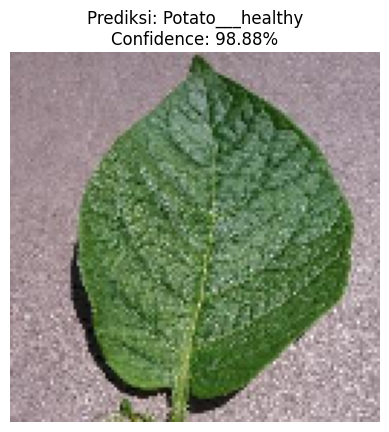

In [29]:
# --- 6. Testing model dengan data baru ---
def predict_image_with_display(image_path, model, img_size=(128, 128)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Tambah batch dim

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')  # Menyembunyikan axis
    plt.title(f"Prediksi: {class_names[predicted_class]}\nConfidence: {confidence*100:.2f}%")
    plt.show()

    return predicted_class, confidence

# Contoh jalankan prediksi dengan menampilkan gambar
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Potato.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


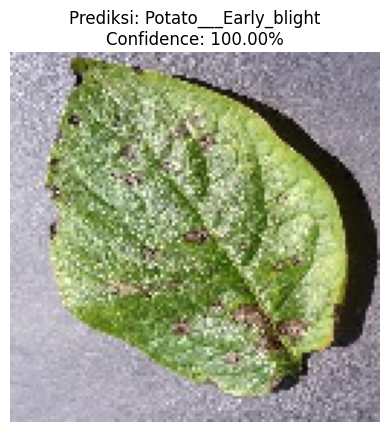

In [ ]:
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Early_blight.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)

In [1]:
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Late_blight2.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)

NameError: name 'predict_image_with_display' is not defined

In [26]:
# Menampilkan jumlah batch di masing-masing dataset
print(f"Jumlah batch di training set: {len(train_ds)}")
print(f"Jumlah batch di validation set: {len(val_ds)}")
print(f"Jumlah batch di testing set: {len(test_ds)}")

# Menampilkan jumlah gambar di masing-masing subset
train_samples = sum([len(batch[0]) for batch in train_ds])
val_samples = sum([len(batch[0]) for batch in val_ds])
test_samples = sum([len(batch[0]) for batch in test_ds])

print(f"Jumlah gambar di training set: {train_samples}")
print(f"Jumlah gambar di validation set: {val_samples}")
print(f"Jumlah gambar di testing set: {test_samples}")


Jumlah batch di training set: 108
Jumlah batch di validation set: 27
Jumlah batch di testing set: 27
Jumlah gambar di training set: 1722
Jumlah gambar di validation set: 430
Jumlah gambar di testing set: 430


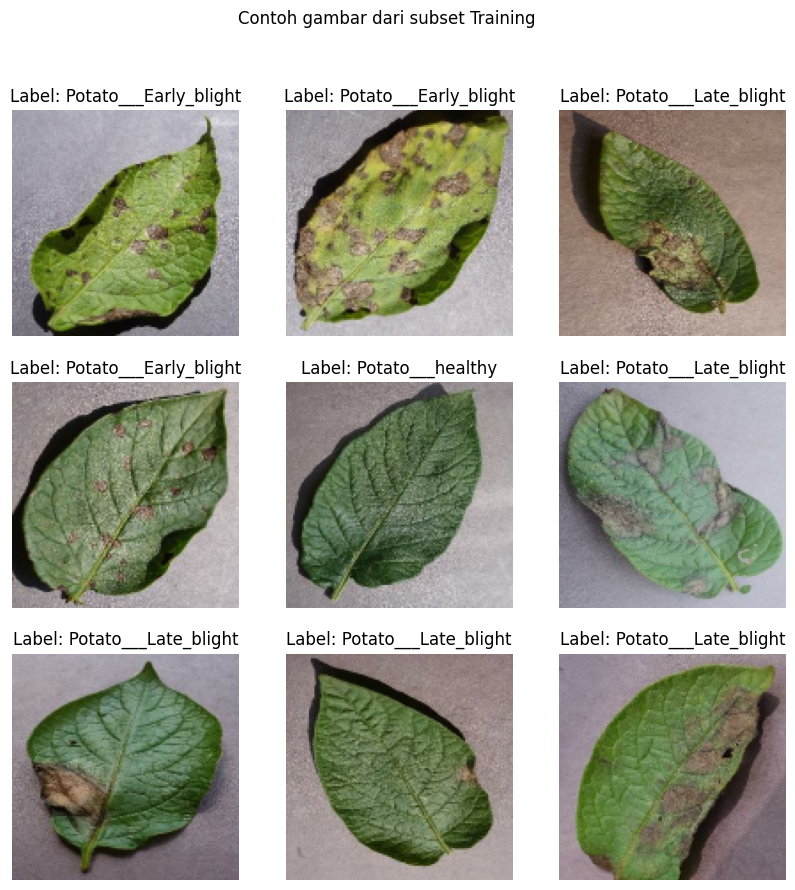

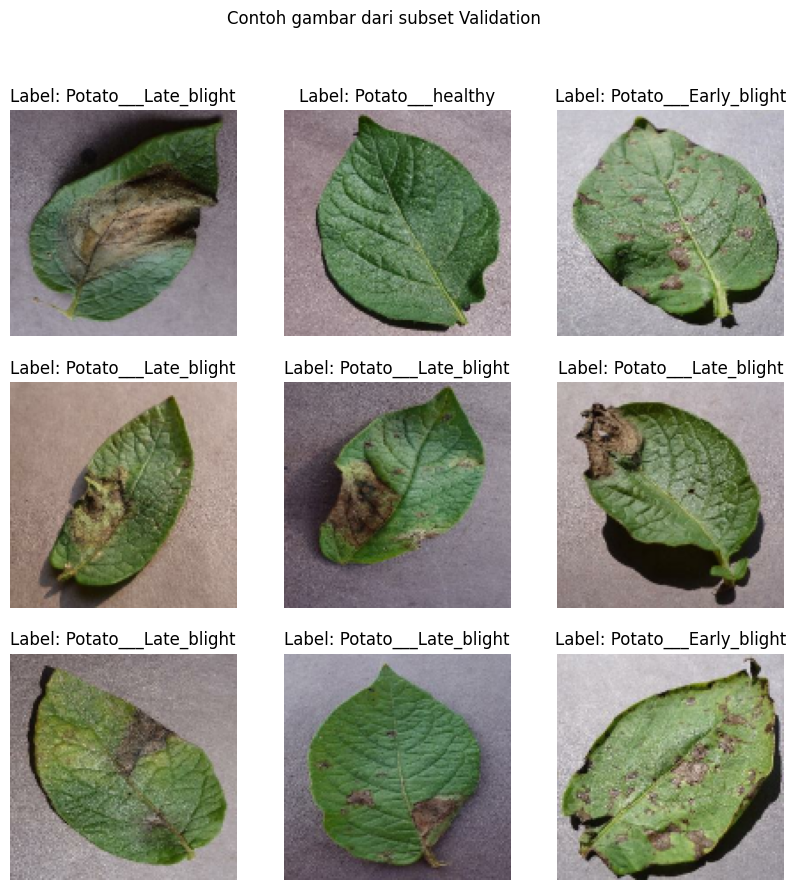

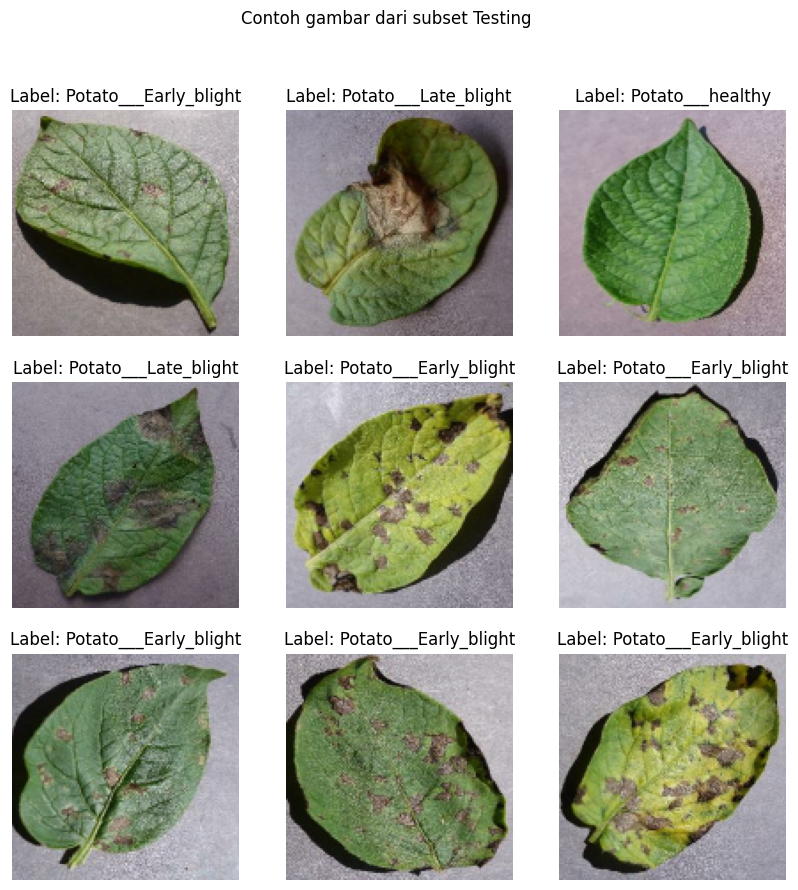

In [27]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def show_sample_images(dataset, subset_name):
    for images, labels in dataset.take(1):  # Ambil satu batch
        plt.figure(figsize=(10, 10))
        for i in range(9):  # Tampilkan 9 gambar contoh
            plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {train_ds.class_names[labels[i]]}")
            plt.axis('off')
        plt.suptitle(f"Contoh gambar dari subset {subset_name}")
        plt.show()

# Tampilkan gambar contoh dari setiap subset
show_sample_images(train_ds, "Training")
show_sample_images(val_ds, "Validation")
show_sample_images(test_ds, "Testing")
